# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Read your api key environment variable
# Reading the News API key enviroment variable
api_key = os.getenv("GGC_NEWSAPI")


In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [ ]:
"""
    newsapi documentation 
    https://newsapi.org/docs/client-libraries/python

Usage
from newsapi import NewsApiClient

# Init
newsapi = NewsApiClient(api_key='63c78635b1e74c2e9ca89afbafb93bb5')

# /v2/top-headlines
top_headlines = newsapi.get_top_headlines(q='bitcoin',
                                          sources='bbc-news,the-verge',
                                          category='business',
                                          language='en',
                                          country='us')

# /v2/everything
all_articles = newsapi.get_everything(q='bitcoin',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2017-12-01',
                                      to='2017-12-12',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

# /v2/sources
sources = newsapi.get_sources()
"""

In [9]:
# Fetch the Bitcoin news articles
#bitcoin_headlines = newsapi.get_top_headlines(q="Bitcoin", language="en", country="us")

bitcoin_headlines = newsapi.get_top_headlines(q='bitcoin',
                                          #sources='bbc-news,the-verge',
                                          category='business',
                                          language='en',
                                          country='us'
                                          )

bitcoin_headlines

{'status': 'ok',
 'totalResults': 2,
 'articles': [{'source': {'id': None, 'name': 'Cointelegraph'},
   'author': 'Joseph Young',
   'title': 'Bitcoin whales continue to accumulate despite BTC price holding above $50K - Cointelegraph',
   'description': 'The number of Bitcoin whales is increasing as the price of BTC continues to rise, strengthening the foundation of the rally.',
   'url': 'https://cointelegraph.com/news/bitcoin-whales-continue-to-accumulate-despite-btc-price-holding-above-50k',
   'urlToImage': 'https://images.cointelegraph.com/images/1200_aHR0cHM6Ly9zMy5jb2ludGVsZWdyYXBoLmNvbS91cGxvYWRzLzIwMjEtMDIvYzdiZWVmZTYtZjMwMy00MTUyLTgxZGQtZGMyNTFiZmYxNTI2LmpwZw==.jpg',
   'publishedAt': '2021-02-18T09:00:35Z',
   'content': 'The number of whale addresses holding Bitcoin (BTC) have hit a new all-time high, the latest data shows. This can be considered bullish, particularly as the price of BTC is showing staying power abov… [+2714 chars]'},
  {'source': {'id': None, 'name': 'Benz

In [10]:
ethereum_headlines = newsapi.get_top_headlines(q='ethereum',
                                          #sources='bbc-news,the-verge',
                                          category='business',
                                          language='en',
                                          country='us'
                                          )

ethereum_headlines

{'status': 'ok', 'totalResults': 0, 'articles': []}

In [116]:
# Fetch the Ethereum news articles
bitcoin_articles = newsapi.get_everything(q='bitcoin',
                                      #sources='bbc-news,the-verge',
                                      #domains='bbc.co.uk,techcrunch.com',
                                      from_param='2021-01-18',
                                      to='2021-02-18',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)                                         

#bitcoin_articles

In [14]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q='ethereum',
                                      #sources='bbc-news,the-verge',
                                      #domains='bbc.co.uk,techcrunch.com',
                                      from_param='2021-01-18',
                                      to='2021-01-18',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)                                         

#ethereum_articles

In [74]:
# Vader sentiment 
# Create the Bitcoin sentiment scores DataFrame
# 

# Create the sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head(25)



,date,compound,negative,neutral,positive,text
0,2021-02-08,0.0000,0.000,1.000,0.000,DoorDash acquires a salad-making robotics star...
1,2021-02-09,0.4939,0.000,0.873,0.127,"By Reuters Staff\r\nSINGAPORE, Feb 9 (Reuters)..."
2,2021-02-09,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: The logo of th...
3,2021-02-05,-0.2263,0.096,0.836,0.069,5 with 5 posters participating\r\nOfficials in...
4,2021-02-11,0.5994,0.000,0.864,0.136,10 with 9 posters participating\r\nMastercard ...
5,2021-02-09,0.7506,0.000,0.787,0.213,It was a Saturday morning and Adam was feeling...
6,2021-02-09,-0.2960,0.064,0.936,0.000,(Repeats for wider audience with no changes to...
7,2021-02-09,0.0000,0.000,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
8,2021-02-08,0.3400,0.000,0.924,0.076,* Dollar index little changed after Friday pay...
9,2021-02-02,0.6705,0.065,0.767,0.167,Elon Musk loves Twitter. But he also hates it....


In [17]:
# Vader sentiment 
# Create the ethereum sentiment scores DataFrame
# 

# Create the sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.tail()


,date,compound,negative,neutral,positive,text
10,2021-01-18,-0.4843,0.135,0.865,0.000,The problem: The auto dealer cant sell the car...
11,2021-01-18,-0.9477,0.368,0.632,0.000,"Fake heiress Anna Sorokin, who was jailed for ..."
12,2021-01-18,0.3400,0.000,0.932,0.068,"Some sources, such as CB Insights, are reporti..."
13,2021-01-18,0.2732,0.000,0.938,0.062,"Atari lends its IP to ZED RUNs digital horses,..."
14,2021-01-18,-0.5267,0.172,0.828,0.000,The CISA Vulnerability Bulletin provides a sum...


In [18]:
# Describe the Bitcoin Sentiment
# Get descriptive stats from the DataFrame
bitcoin_df.describe()

,compound,negative,neutral,positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.187522,0.029778,0.894556,0.075611
std,0.419171,0.046057,0.082630,0.076788
min,-0.557400,0.000000,0.763000,0.000000
25%,-0.114825,0.000000,0.843000,0.000000
50%,0.148000,0.000000,0.915000,0.074500
75%,0.518500,0.064750,0.934500,0.118500
max,0.851900,0.137000,1.000000,0.237000


In [19]:
# Describe the ethereum Sentiment
# Get descriptive stats from the DataFrame
ethereum_df.describe()

,compound,negative,neutral,positive
count,15.000000,15.000000,15.000000,15.000000
mean,-0.018820,0.083200,0.858400,0.058333
std,0.521306,0.106055,0.092802,0.061094
min,-0.947700,0.000000,0.632000,0.000000
25%,-0.493300,0.000000,0.802500,0.000000
50%,0.250000,0.048000,0.889000,0.062000
75%,0.318000,0.120500,0.909500,0.090500
max,0.709600,0.368000,1.000000,0.205000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin = 0.075611

Q: Which coin had the highest compound score?

A: Bitcoin = 0.851900

Q. Which coin had the highest positive score?

A: Bitcoin = 0.237000

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [36]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [37]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!


In [84]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    # Convert the words to lowercase   
    # Remove the punctuation    
    # Remove the stop words
    # Lemmatize Words into root words 

    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    sw_addons = {'number', 'addresses', 'have', 'data', 'price', 'power', 'week', 'basically', 'also'}
    
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [88]:
bitcoin_df['tokens'] = bitcoin_df.apply(lambda row: tokenizer(row.text), axis=1)
bitcoin_df.head()

,date,compound,negative,neutral,positive,text,tokens
0,2021-02-08,0.0000,0.000,1.000,0.000,DoorDash acquires a salad-making robotics star...,"[doordash, acquires, saladmaking, robotics, st..."
1,2021-02-09,0.4939,0.000,0.873,0.127,"By Reuters Staff\r\nSINGAPORE, Feb 9 (Reuters)...","[reuters, staffsingapore, feb, reuters, crypto..."
2,2021-02-09,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: The logo of th...,"[reuters, stafffile, photo, logo, bitcoin, dig..."
3,2021-02-05,-0.2263,0.096,0.836,0.069,5 with 5 posters participating\r\nOfficials in...,"[poster, participatingofficials, germany, seiz..."
4,2021-02-11,0.5994,0.000,0.864,0.136,10 with 9 posters participating\r\nMastercard ...,"[poster, participatingmastercard, said, wednes..."


In [89]:
ethereum_df['tokens'] = ethereum_df.apply(lambda row: tokenizer(row.text), axis=1)
ethereum_df.head()


,date,compound,negative,neutral,positive,text,tokens
0,2021-01-18,-0.5023,0.106,0.894,0.000,The Coming Death of Cash and the Battle for th...,"[coming, death, cash, battle, future, money, o..."
1,2021-01-18,0.6114,0.000,0.889,0.111,Happy Martin Luther King Jr. Day to our U.S. r...,"[happy, martin, luther, king, jr, day, us, rea..."
2,2021-01-18,0.3818,0.000,0.902,0.098,"<ul><li>Yearn.Finance has a clear path to $42,...","[ulliyearnfinance, ha, clear, path, according,..."
3,2021-01-18,-0.1154,0.063,0.886,0.051,The anticipated flow of institutional capital ...,"[anticipated, flow, institutional, capital, cr..."
4,2021-01-18,-0.8360,0.223,0.777,0.000,Investors are beginning to worry that Bitcoins...,"[investors, beginning, worry, bitcoins, btc, u..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [87]:
from collections import Counter
from nltk import ngrams

In [134]:
bitcoin_articles["articles"][0]['content']

'DoorDash acquires a salad-making robotics startup, Twitter confirms subscription plans and Tesla makes a big bet on bitcoin. This is your Daily Crunch for February 8, 2021.\r\nThe big story: DoorDash a… [+3188 chars]'

In [151]:
bigram_counts_btc = Counter(ngrams(tokenizer(bitcoin_articles["articles"][0]['content']), n=2))   # n=2 bigrams  n=3 trigrams 
dict(bigram_counts_btc)

{('doordash', 'acquires'): 1,
 ('acquires', 'saladmaking'): 1,
 ('saladmaking', 'robotics'): 1,
 ('robotics', 'startup'): 1,
 ('startup', 'twitter'): 1,
 ('twitter', 'confirms'): 1,
 ('confirms', 'subscription'): 1,
 ('subscription', 'plan'): 1,
 ('plan', 'tesla'): 1,
 ('tesla', 'make'): 1,
 ('make', 'big'): 1,
 ('big', 'bet'): 1,
 ('bet', 'bitcoin'): 1,
 ('bitcoin', 'daily'): 1,
 ('daily', 'crunch'): 1,
 ('crunch', 'february'): 1,
 ('february', 'big'): 1,
 ('big', 'story'): 1,
 ('story', 'doordash'): 1,
 ('doordash', 'char'): 1}

In [18]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

[(('40', 'million'), 3),
 (('Cryptocurrency', 'exchange'), 2),
 (('exchange', 'Binance'), 2),
 (('crypto', 'asset'), 2),
 (('world', '’'), 2),
 (('crypto', 'exchange'), 2),
 (('7,000', 'bitcoins'), 2),
 (('one', 'world'), 2),
 (('price', 'Bitcoin'), 2),
 (('Wall', 'Street'), 2),
 (('Street', 'Market'), 2),
 (('last', 'week'), 2),
 (('char', 'Cryptocurrency'), 2),
 (('Binance', 'resumed'), 1),
 (('resumed', 'trading'), 1),
 (('trading', 'activity'), 1),
 (('activity', 'Users'), 1),
 (('Users', 'cancel'), 1),
 (('cancel', 'open'), 1),
 (('open', 'order'), 1)]

In [153]:
bigram_counts_eth = Counter(ngrams(tokenizer(ethereum_articles["articles"][0]['content']), n=2))   # n=2 bigrams  n=3 trigrams 
dict(bigram_counts_eth)

{('coming', 'death'): 1,
 ('death', 'cash'): 1,
 ('cash', 'battle'): 1,
 ('battle', 'future'): 1,
 ('future', 'money'): 2,
 ('money', 'one'): 1,
 ('one', 'future'): 1,
 ('future', 'private'): 1,
 ('private', 'anonymous'): 1,
 ('anonymous', 'alternative'): 1,
 ('alternative', 'cash'): 1,
 ('cash', 'black'): 1,
 ('black', 'mirror'): 1,
 ('mirror', 'future'): 1,
 ('money', 'pocket'): 1,
 ('pocket', 'knows'): 1,
 ('knows', 'everythin'): 1,
 ('everythin', 'char'): 1}

In [19]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

[(('private', 'key'), 5),
 (('Ethereum', 'ETH'), 3),
 (('blockchain', 'bandit'), 2),
 (('last', 'year'), 2),
 (('weak', 'private'), 2),
 (('Elon', 'Musk'), 2),
 (('worth', 'Ethereum'), 2),
 (('JP', 'Morgan'), 2),
 (('President', 'Trump'), 1),
 (('Trump', 'tweeted'), 1),
 (('tweeted', 'insult'), 1),
 (('insult', 'Twitter'), 1),
 (('Twitter', 'morning'), 1),
 (('morning', 'time'), 1),
 (('time', 'Jack'), 1),
 (('Jack', 'took'), 1),
 (('took', 'conversation'), 1),
 (('conversation', 'platform'), 1),
 (('platform', 'White'), 1),
 (('White', 'House'), 1)]

In [155]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [158]:
#print(dict(bigram_counts.most_common(10)))
token_count(tokenizer(bitcoin_articles["articles"][0]['content']))

[('doordash', 2),
 ('big', 2),
 ('acquires', 1),
 ('saladmaking', 1),
 ('robotics', 1),
 ('startup', 1),
 ('twitter', 1),
 ('confirms', 1),
 ('subscription', 1),
 ('plan', 1)]

In [21]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!

[('char', 16),
 ('Bitcoin', 8),
 ('’', 8),
 ('price', 6),
 ('hacker', 6),
 ('exchange', 5),
 ('Binance', 5),
 ('crypto', 4),
 ('cryptocurrency', 4),
 ('million', 4)]

In [160]:
token_count(tokenizer(ethereum_articles["articles"][0]['content']))

[('future', 3),
 ('cash', 2),
 ('money', 2),
 ('coming', 1),
 ('death', 1),
 ('battle', 1),
 ('one', 1),
 ('private', 1),
 ('anonymous', 1),
 ('alternative', 1)]

In [22]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!

[('char', 19),
 ('Ethereum', 9),
 ('blockchain', 8),
 ('key', 7),
 ('private', 5),
 ('world', 5),
 ('time', 4),
 ('weak', 4),
 ('million', 4),
 ('transaction', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [166]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

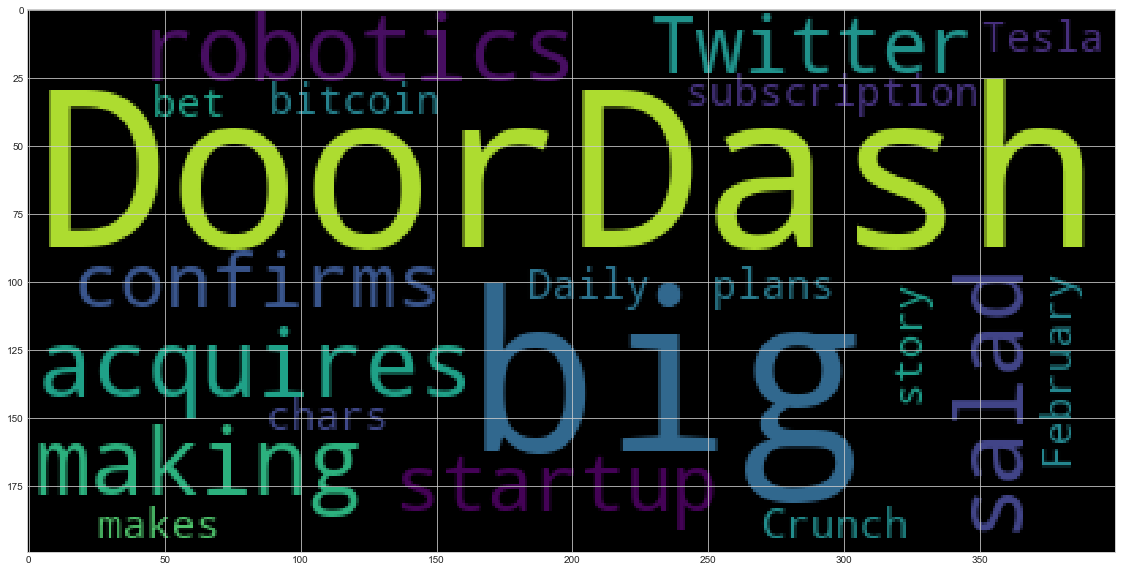

In [168]:
wc = WordCloud().generate(bitcoin_articles["articles"][0]['content'])
plt.imshow(wc)

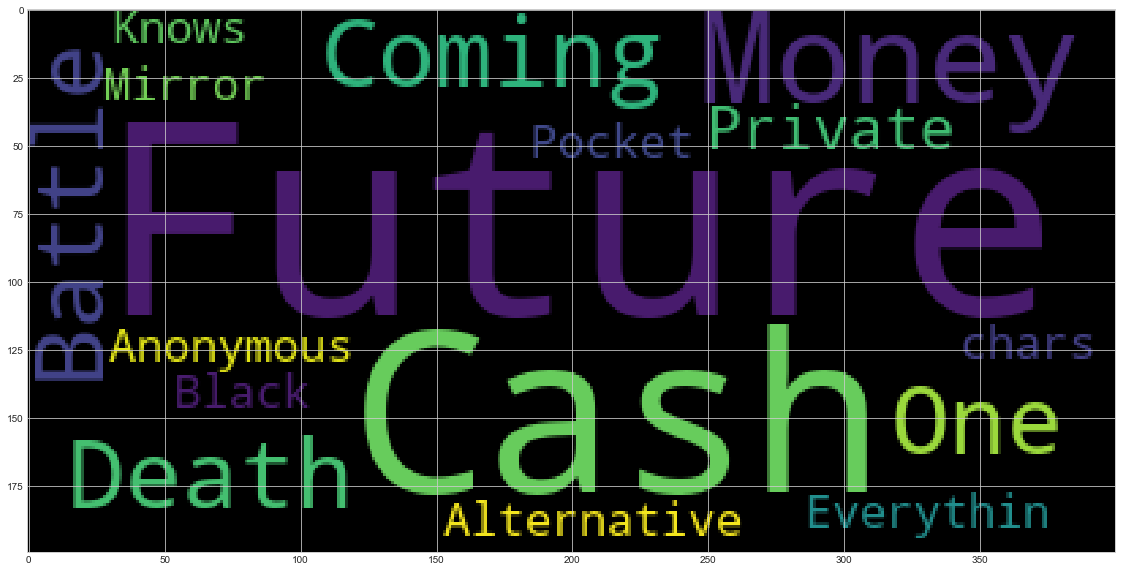

In [169]:
wc = WordCloud().generate(ethereum_articles["articles"][0]['content'])
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

'Cryptocurrency exchange Binance has resumed trading activity. Users can now cancel open orders, deposit crypto assets into their Binance account, and of course buy and sell cryptocurrencies. You cant withdraw crypto assets to an external wallet just yet, but … [+1191 chars]Bitcoin is now trading at around $8,130, up a whopping 60.84 percent over the past month, with the price surging $3,086.14 over the period.\r\nThe cryptocurrency’s meteoric rise is reminiscent of its rocketing growth in the latter half of 2017, when prices reac… [+4311 chars]Binance has vowed to raise the quality of its security in the aftermath of a hack that saw thieves make off with over $40 million in Bitcoin from the exchange.\r\nThe company — which is widely believed to operate the world’s largest crypto exchange based on tra… [+2269 chars]A new payment network called Flexa is launching today that’ll let you spend cryptocurrencies in physical stores. The technology currently supports bitcoin, ether, bitcoin ca

In [31]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [32]:
# Render the visualization
# YOUR CODE HERE!

In [33]:
# List all Entities
# YOUR CODE HERE!

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [36]:
# Render the visualization
# YOUR CODE HERE!

In [37]:
# List all Entities
# YOUR CODE HERE!

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f